In [18]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
DATA = pd.read_csv('data/prototype_ready.csv', sep=';', encoding='cp1251')

In [15]:
DATA

,addr_street,addr_number,addr_building,addr_letter,addr_district,data_buildingdate,param_ukname,repair_years,repair_work_problem,number,lat,lon,data_reconstructiondate,age,index_r,age_norm,age_norm_inv
0,Байконурская ул.,5,1.0,А,Приморский,1977,"ООО ""Жилкомсервис №3 Приморского района""",2019,Капитальный ремонт лифтов с частичной заменой ...,14786,30.350723,59.959350,8.0,41,0.034071,0.129371,0.870629
1,"г.Павловск, Толмачева ул.",3,0.0,А,Пушкинский,1962,"ООО ""Жилкомсервис №2 Пушкинского района""",2020,Ремонт или замена системы электроснабжения; Ре...,9635,30.201396,59.828351,4.0,56,0.060067,0.181818,0.818182
2,Непокоренных пр.,11,0.0,А,Калининский,1951,ООО «Жилкомсервис № 2 Калининского района»,2020,Ремонт конструкций и замена покрытий крыш,11577,30.351998,59.928983,2.0,67,0.098647,0.220280,0.779720
3,Шишмарёвского пер.,3,1.0,А,Приморский,1951,"ООО ""Жилкомсервис №2 Приморского района""",2020,Ремонт конструкций и замена покрытий крыш; Рем...,2238,30.330780,59.998162,4.0,67,0.054599,0.220280,0.779720
4,Кавалергардская ул.,22,0.0,А,Центральный,1908,"ООО ""Жилкомсервис №3 Центрального района""",2019,Ремонт или замена системы горячего водоснабжен...,19413,30.318482,59.914953,5.0,110,0.032551,0.370629,0.629371
5,Пр. Славы,40,1.0,А (пар.1-3),Фрунзенский,1999,"ТСЖ ""СВЕТ""",2020,Ремонт конструкций и замена покрытий крыш; Рем...,1008,30.272012,60.045965,4.0,19,0.101776,0.052448,0.947552
6,Новоизмайловский пр.,30,2.0,А,Московский,1962,"ООО ""Жилкомсервис № 3 Московского района""",2020,Ремонт или замена системы холодного водоснабжения,6348,30.340320,59.971150,3.0,56,0.077952,0.181818,0.818182
7,Маршала Жукова пр.,37,3.0,А,Красносельский,1986,"ООО ""Строитель""",2019,Ремонт конструкций и замена покрытий крыш; Рем...,3709,30.300166,59.916144,8.0,32,0.039177,0.097902,0.902098
8,Энгельса пр.,151,2.0,А,Выборгский,1976,"Общество с ограниченной ответственностью ""Жил...",2020,Ремонт или замена системы холодного водоснабже...,3603,30.285227,59.943602,6.0,42,0.046476,0.132867,0.867133
9,Шлиссельбургский пр.,18,1.0,А,Невский,1989,ЖСК №1292,2020,Ремонт или замена системы электроснабжения; Ре...,8352,30.134983,59.999269,1.0,29,0.226143,0.087413,0.912587


In [16]:
answer = DATA[(DATA.addr_street=='Байконурская ул.')&(DATA.addr_number=='5')&
        (DATA.addr_building==1.0)&(DATA.addr_letter=='А')]

answer.to_dict('record')[0]

{'addr_building': 1.0,
 'addr_district': 'Приморский',
 'addr_letter': 'А',
 'addr_number': '5',
 'addr_street': 'Байконурская ул.',
 'age': 41,
 'age_norm': 0.12937062937062938,
 'age_norm_inv': 0.8706293706293706,
 'data_buildingdate': 1977,
 'data_reconstructiondate': 8.0,
 'index_r': 0.03407130540748566,
 'lat': 30.350723,
 'lon': 59.95935,
 'number': 14786,
 'param_ukname': 'ООО "Жилкомсервис №3 Приморского района"',
 'repair_work_problem': 'Капитальный ремонт лифтов с частичной заменой оборудования: модернизация лифтов',
 'repair_years': 2019}

In [72]:
d = DATA[DATA.number==14786][['age_norm_inv', 'index_r']].melt()

d = d.reset_index()
d['index'] = [0, 0]
d

,index,variable,value
0,0,age_norm_inv,0.870629
1,0,index_r,0.034071


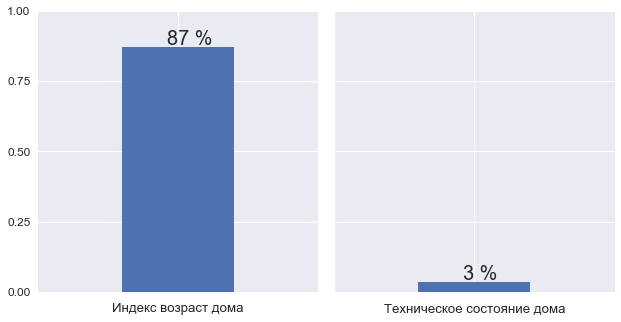

In [102]:
g = sns.FacetGrid(d, col="variable", size=5, aspect=0.9)
sns.set(font_scale=1.2)
g.map(plt.bar, 'index', "value")
g.set(xticks=[-1, 0, 1], yticks=[0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, 0, 1], ['', '', ''])
g.set_axis_labels('')
for ax, set_xlabel, text in zip(g.axes.flat, 
                                ['Индекс возраст дома', 'Техническое состояние дома'], 
                                [d[d.variable=='age_norm_inv']['value'][0], d[d.variable=='index_r']['value'][1]]):
    ax.set_xlabel(set_xlabel)
    ax.set_ylabel('')
    ax.set_title('')
    ax.text(-0.08, text + 0.01, str(int(round(text, 2)*100)) +' %', size=20) 

In [94]:
d

,index,variable,value
0,0,age_norm_inv,0.870629
1,0,index_r,0.034071


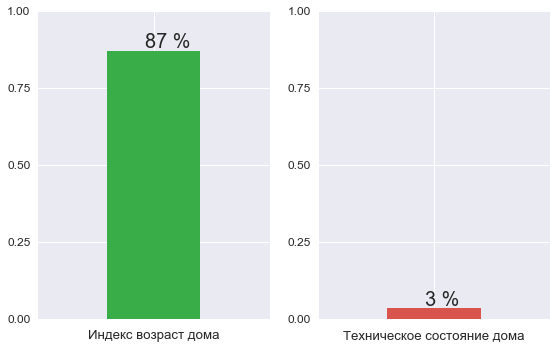

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(data, name):
    d = data[['age_norm_inv', 'index_r']].melt()
    d = d.reset_index()
    d['index'] = [0, 0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    fig.tight_layout()
    for ax, name, text, set_xlabel in zip(axes, 
                                        ['age_norm_inv', 'index_r'], 
                                        [d[d.variable=='age_norm_inv']['value'][0], d[d.variable=='index_r']['value'][1]],
                                        ['Индекс возраст дома', 'Техническое состояние дома']):
        index = d[d['variable'] == name]['index'].values
        value = d[d['variable'] == name]['value'].values
        if value<0.5:
            ax.bar(index, value, color=sns.xkcd_rgb["pale red"])
        else:
            ax.bar(index, value, color=sns.xkcd_rgb["medium green"])
        ax.set_xticks([-1, 0, 1])
        ax.set_xticklabels(['', '', ''])
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xlabel(set_xlabel)
        ax.text(-0.08, text + 0.01, str(int(round(text, 2)*100)) +' %', size=20) 
        plt.savefig('app/static/' + str(name))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot(data, name):
    d = data[['age_norm_inv', 'index_r']].melt()
    d = d.reset_index()
    d['index'] = [0, 0]
    g = sns.FacetGrid(d, col="variable", size=4, aspect=0.9)
    sns.set(font_scale=1.2)
    g.map(plt.bar, 'index', "value")
    g.set(xticks=[-1, 0, 1], yticks=[0, 0.25, 0.5, 0.75, 1])
    plt.xticks([-1, 0, 1], ['', '', ''])
    g.set_axis_labels('')
    for ax, set_xlabel, text in zip(g.axes.flat, 
                                    ['Индекс возраст дома', 'Техническое состояние дома'], 
                                    [d[d.variable=='age_norm_inv']['value'][0], d[d.variable=='index_r']['value'][1]]):
        
        ax.set_xlabel(set_xlabel)
        ax.set_ylabel('')
        ax.set_title('')
        ax.text(-0.08, text + 0.01, str(int(round(text, 2)*100)) +' %', size=15)
        plt.savefig('app/static/' + str(name))

In [112]:
DATA[DATA.number==21355]

,addr_street,addr_number,addr_building,addr_letter,addr_district,data_buildingdate,param_ukname,repair_years,repair_work_problem,number,lat,lon,data_reconstructiondate,age,index_r,age_norm,age_norm_inv
5271,Шелгунова ул.,7,2.0,А,Невский,2013,"ООО ""Управление комфорт-сервис""",2020,Ремонт или замена системы холодного водоснабже...,21355,30.483476,59.886063,0.0,5,0.926214,0.003497,0.996503


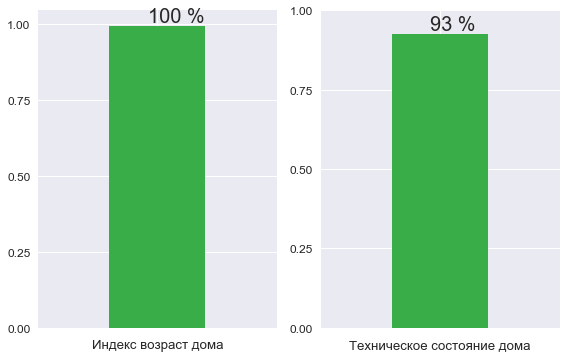

In [111]:
plot(DATA[DATA.number==21355], 21355)

_____